In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [15]:
# bu sefer interpolate edelim:

df.TOTAL_REVENUE = df.TOTAL_REVENUE.interpolate()
df.TOTAL_EXPENDITURE = df.TOTAL_EXPENDITURE.interpolate()


## Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

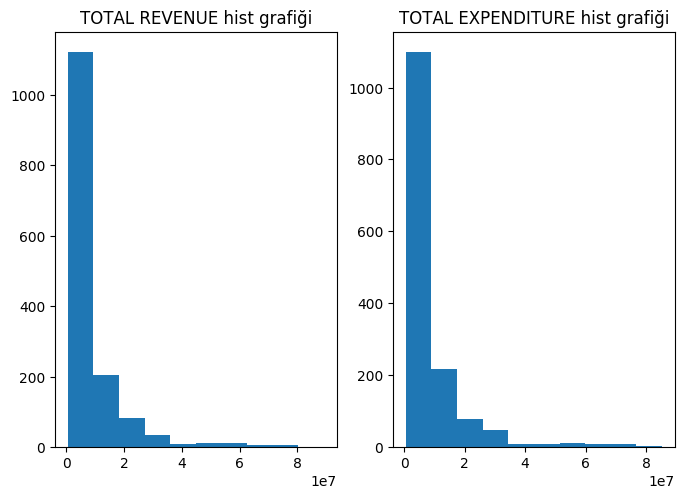

In [16]:
# Önce görselleştirerek inceleyelim:

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

plt.subplot(121)
plt.hist(df["TOTAL_REVENUE"], )
plt.title("TOTAL REVENUE hist grafiği")

plt.subplot(122)
plt.hist(df["TOTAL_EXPENDITURE"], )
plt.title("TOTAL EXPENDITURE hist grafiği")

plt.show()

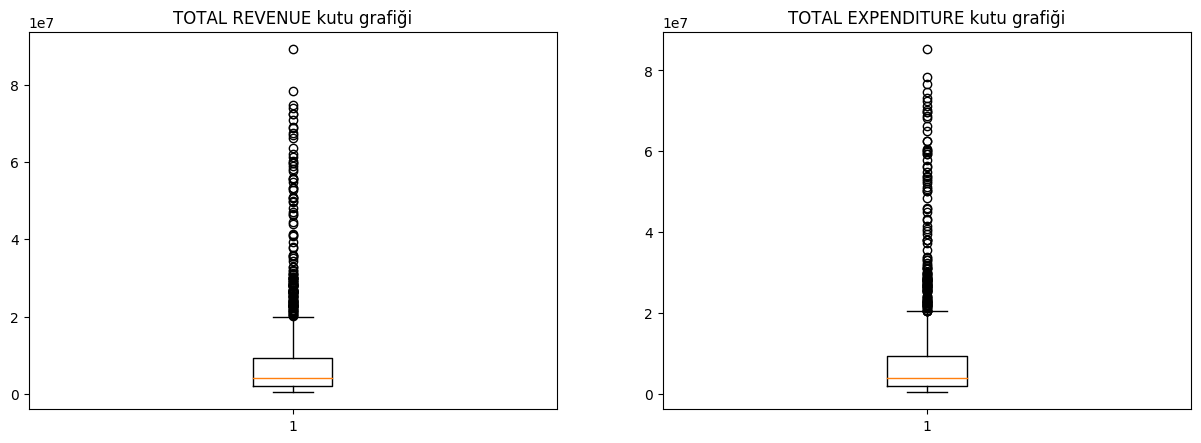

In [17]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.boxplot(df["TOTAL_REVENUE"] )
plt.title("TOTAL REVENUE kutu grafiği")

plt.subplot(122)
plt.boxplot(df["TOTAL_EXPENDITURE"])
plt.title("TOTAL EXPENDITURE kutu grafiği")
plt.show()

## Histogramda aykırı değerler olduğu net görülüyor ama kutu grafiğinin whis'ini biraz daha artıralım

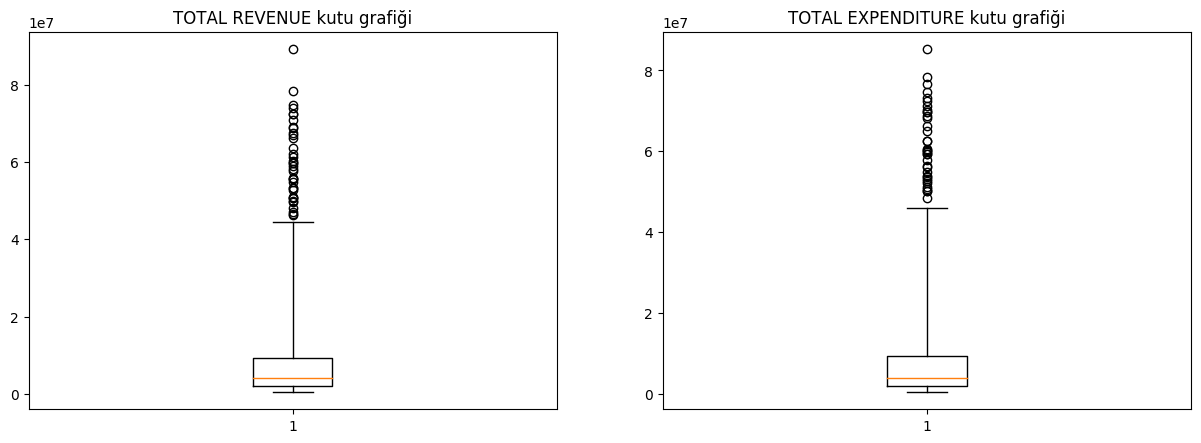

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.boxplot(df["TOTAL_REVENUE"], whis = 5 )
plt.title("TOTAL REVENUE kutu grafiği")

plt.subplot(122)
plt.boxplot(df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("TOTAL EXPENDITURE kutu grafiği")
plt.show()

## Oldukça fazla aşırı değerimiz mevcut
buradaki eşik değeri ile z-score threshhold aynı mı????

In [33]:
# Aykırı değer sayımızı bulalım:

def aykiri(veriler):
    q75, q25 = np.percentile(veriler, [75 ,25])
    caa = q75 - q25
    
    esik_degerler=pd.DataFrame()
    
    for esik_degeri in np.arange(1,5.5,0.5):
        min_deger = q25 - (caa*esik_degeri)
        maks_deger = q75 + (caa*esik_degeri)
    
        aykiri_deger_sayisi = len((np.where((veriler > maks_deger)| 
                                       (veriler < min_deger))[0]))
    
        esik_degerler = esik_degerler.append({'Eşik Değeri': esik_degeri,'Aykırı Değer Sayısı': aykiri_deger_sayisi,
                                           }, ignore_index=True)
    
    return esik_degerler

In [34]:
aykiri(df.TOTAL_REVENUE)

,Aykırı Değer Sayısı,Eşik Değeri
0,188.0,1.0
1,138.0,1.5
2,111.0,2.0
3,81.0,2.5
4,57.0,3.0
5,49.0,3.5
6,43.0,4.0
7,39.0,4.5
8,37.0,5.0


In [35]:
aykiri(df.TOTAL_EXPENDITURE)

,Aykırı Değer Sayısı,Eşik Değeri
0,185.0,1.0
1,139.0,1.5
2,106.0,2.0
3,80.0,2.5
4,56.0,3.0
5,50.0,3.5
6,45.0,4.0
7,41.0,4.5
8,36.0,5.0


## Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

log dönüşümünde hala aykırı değer kalabilir, winsorize edip limitleri sınırlandırırsam, aykırı değeri sıfıra çekebilirim

In [51]:
winsorize_revenue = winsorize(df["TOTAL_REVENUE"], (0, 0.15))
winsorize_expenditure = winsorize(df['TOTAL_EXPENDITURE'], (0, 0.15))

#winsorize ' ı %90 yaptığımıda 0 eşik değerinde hala aykırı değer aldım, bir de hep yukarı yönde aykırı değerim
# olduğu için tek yönlü winsorize ettim

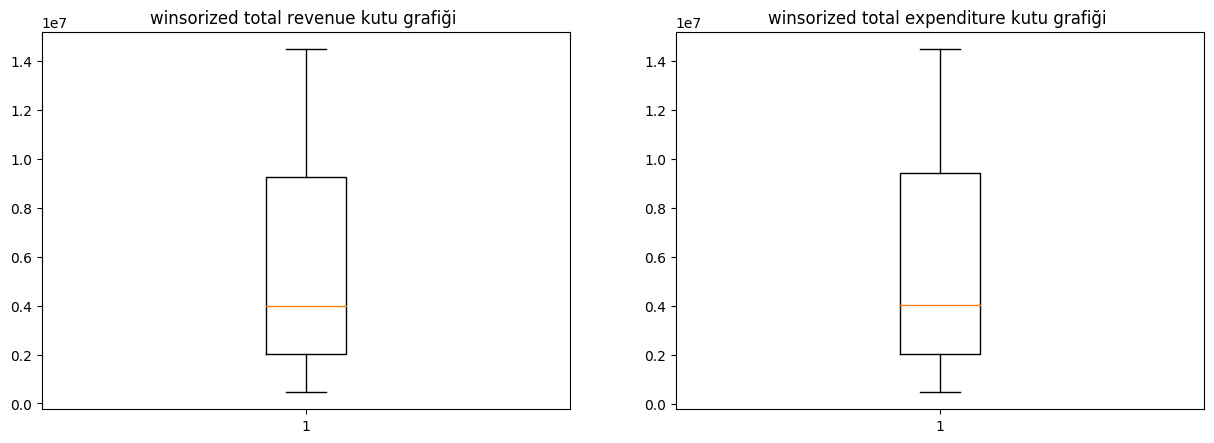

In [49]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.boxplot(winsorize_revenue)
plt.title("winsorized total revenue kutu grafiği ")

plt.subplot(122)
plt.boxplot(winsorize_expenditure)
plt.title("winsorized total expenditure kutu grafiği ")
plt.show()

In [53]:
print(aykiri(winsorize_expenditure))
print(aykiri(winsorize_revenue))

   Aykırı Değer Sayısı  Eşik Değeri
0                  0.0          1.0
1                  0.0          1.5
2                  0.0          2.0
3                  0.0          2.5
4                  0.0          3.0
5                  0.0          3.5
6                  0.0          4.0
7                  0.0          4.5
8                  0.0          5.0
   Aykırı Değer Sayısı  Eşik Değeri
0                  0.0          1.0
1                  0.0          1.5
2                  0.0          2.0
3                  0.0          2.5
4                  0.0          3.0
5                  0.0          3.5
6                  0.0          4.0
7                  0.0          4.5
8                  0.0          5.0


## 3. Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [54]:
butce_acigi = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
butce_acigi

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -878807.0
5       -79653.0
6       112964.0
7         6449.0
8       -33413.0
9       200657.0
10         959.0
11      -43312.0
12      -26832.0
13     -101910.0
14     -122480.0
15     -131840.0
16       10433.0
17      124820.0
18      -21600.0
19      -22050.0
20      -39876.0
21      272099.0
22     -207551.0
23     -296441.0
24       -7284.0
25     -153918.0
26       47974.0
27        8367.0
28     -154575.0
29       -3256.0
          ...   
1462     10440.0
1463     10440.0
1464     10440.0
1465     10440.0
1466     10440.0
1467     10440.0
1468     10440.0
1469     10440.0
1470     10440.0
1471     10440.0
1472     10440.0
1473     10440.0
1474     10440.0
1475     10440.0
1476     10440.0
1477     10440.0
1478     10440.0
1479     10440.0
1480     10440.0
1481     10440.0
1482     10440.0
1483     10440.0
1484     10440.0
1485     10440.0
1486     10440.0
1487     10440.0
1488     10440.0
1489     10440

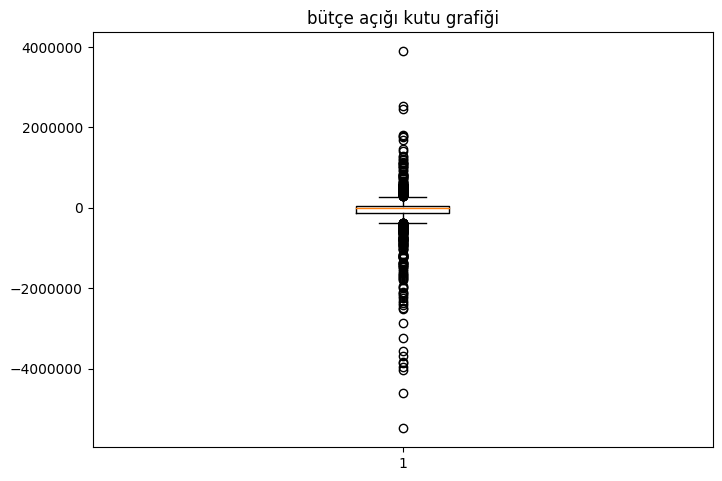

In [55]:
plt.boxplot(butce_acigi)
plt.title("bütçe açığı kutu grafiği")
plt.show()

aykırı değerleri temizlemediğimiz için bütçe açığı verilerinde de oldukça fazla aykırı değerimiz oldu

In [56]:
aykiri(butce_acigi)

,Aykırı Değer Sayısı,Eşik Değeri
0,358.0,1.0
1,275.0,1.5
2,231.0,2.0
3,182.0,2.5
4,147.0,3.0
5,124.0,3.5
6,111.0,4.0
7,97.0,4.5
8,82.0,5.0


## 4. Soru: şimdi winsorized değerlerimiz ile hesaplamayı tekrar yapıyoruz

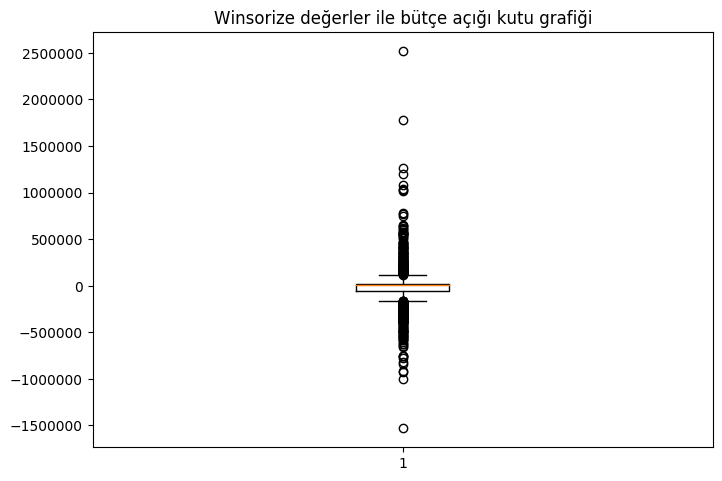

In [58]:
winsor_butce_acigi = winsorize_revenue - winsorize_expenditure

plt.boxplot(winsor_butce_acigi)
plt.title('Winsorize değerler ile bütçe açığı kutu grafiği')
plt.show()

In [59]:
aykiri(winsor_butce_acigi)

,Aykırı Değer Sayısı,Eşik Değeri
0,453.0,1.0
1,373.0,1.5
2,309.0,2.0
3,253.0,2.5
4,197.0,3.0
5,165.0,3.5
6,139.0,4.0
7,116.0,4.5
8,92.0,5.0


# Aykırı değer sayımız arttı! bunu da winsorize edelim

In [72]:
winsorize_butce = winsorize(winsor_butce_acigi, (0.15, 0.15))

In [73]:
aykiri(winsorize_butce)

,Aykırı Değer Sayısı,Eşik Değeri
0,252.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5
8,0.0,5.0


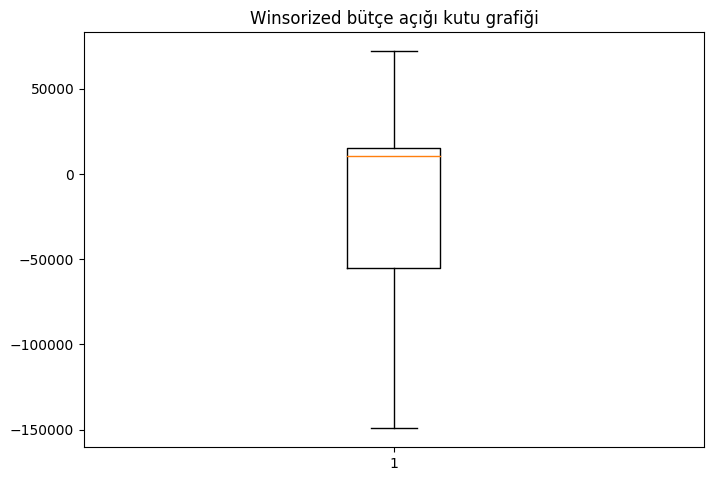

In [74]:
plt.boxplot(winsorize_butce)
plt.title('Winsorized bütçe açığı kutu grafiği')
plt.show()

In [75]:
winsor_butce_acigi.mean()

-12693.189678284183

In [76]:
winsorize_butce.mean()

-17531.17158176944

## 5. soru: Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz? Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

ikisi arasında oldukça farklı değerler var, öncelikle ilkinde daha az aykırı değer aldık.

ikincisinde ise bütçeyi winsorize ettiğimizde aykırı değerlerden kurtulmak için limitleri değiştirdik ancak yine de 0.eşikte aykırı değerimiz kaldı. Daha zayıf bir aralıkta hala aykırı değer bulunduğu için 3.yü tercih ederdim.

Bütçe açığı önemli bir değişkense, bütçe açığı üzerinde değil onu etkileyen metrikler üzerinde data temizliği yapmak daha mantıklı geliyor.

